# First steps

After installing the plugin you can open it from the menu under the name ```ConvPaint```. You can use the plugin with various types of images: simple gray-scale, multi-channel, time-lapse, RGB. Note that while you can annotate stacks of images, the learning is never done in real 3D, but all 2D annotations of a stack are are combined for trainig.

To start you can just use one of the images provides as a sample by napari. For example the ```human mitosis``` dataset:

In [4]:
import napari
from napari_convpaint.conv_paint import ConvPaintWidget

In [2]:
viewer = napari.Viewer()
viewer.open_sample(plugin='napari', sample='human_mitosis');
self = ConvPaintWidget(viewer)
viewer.window.add_dock_widget(self);

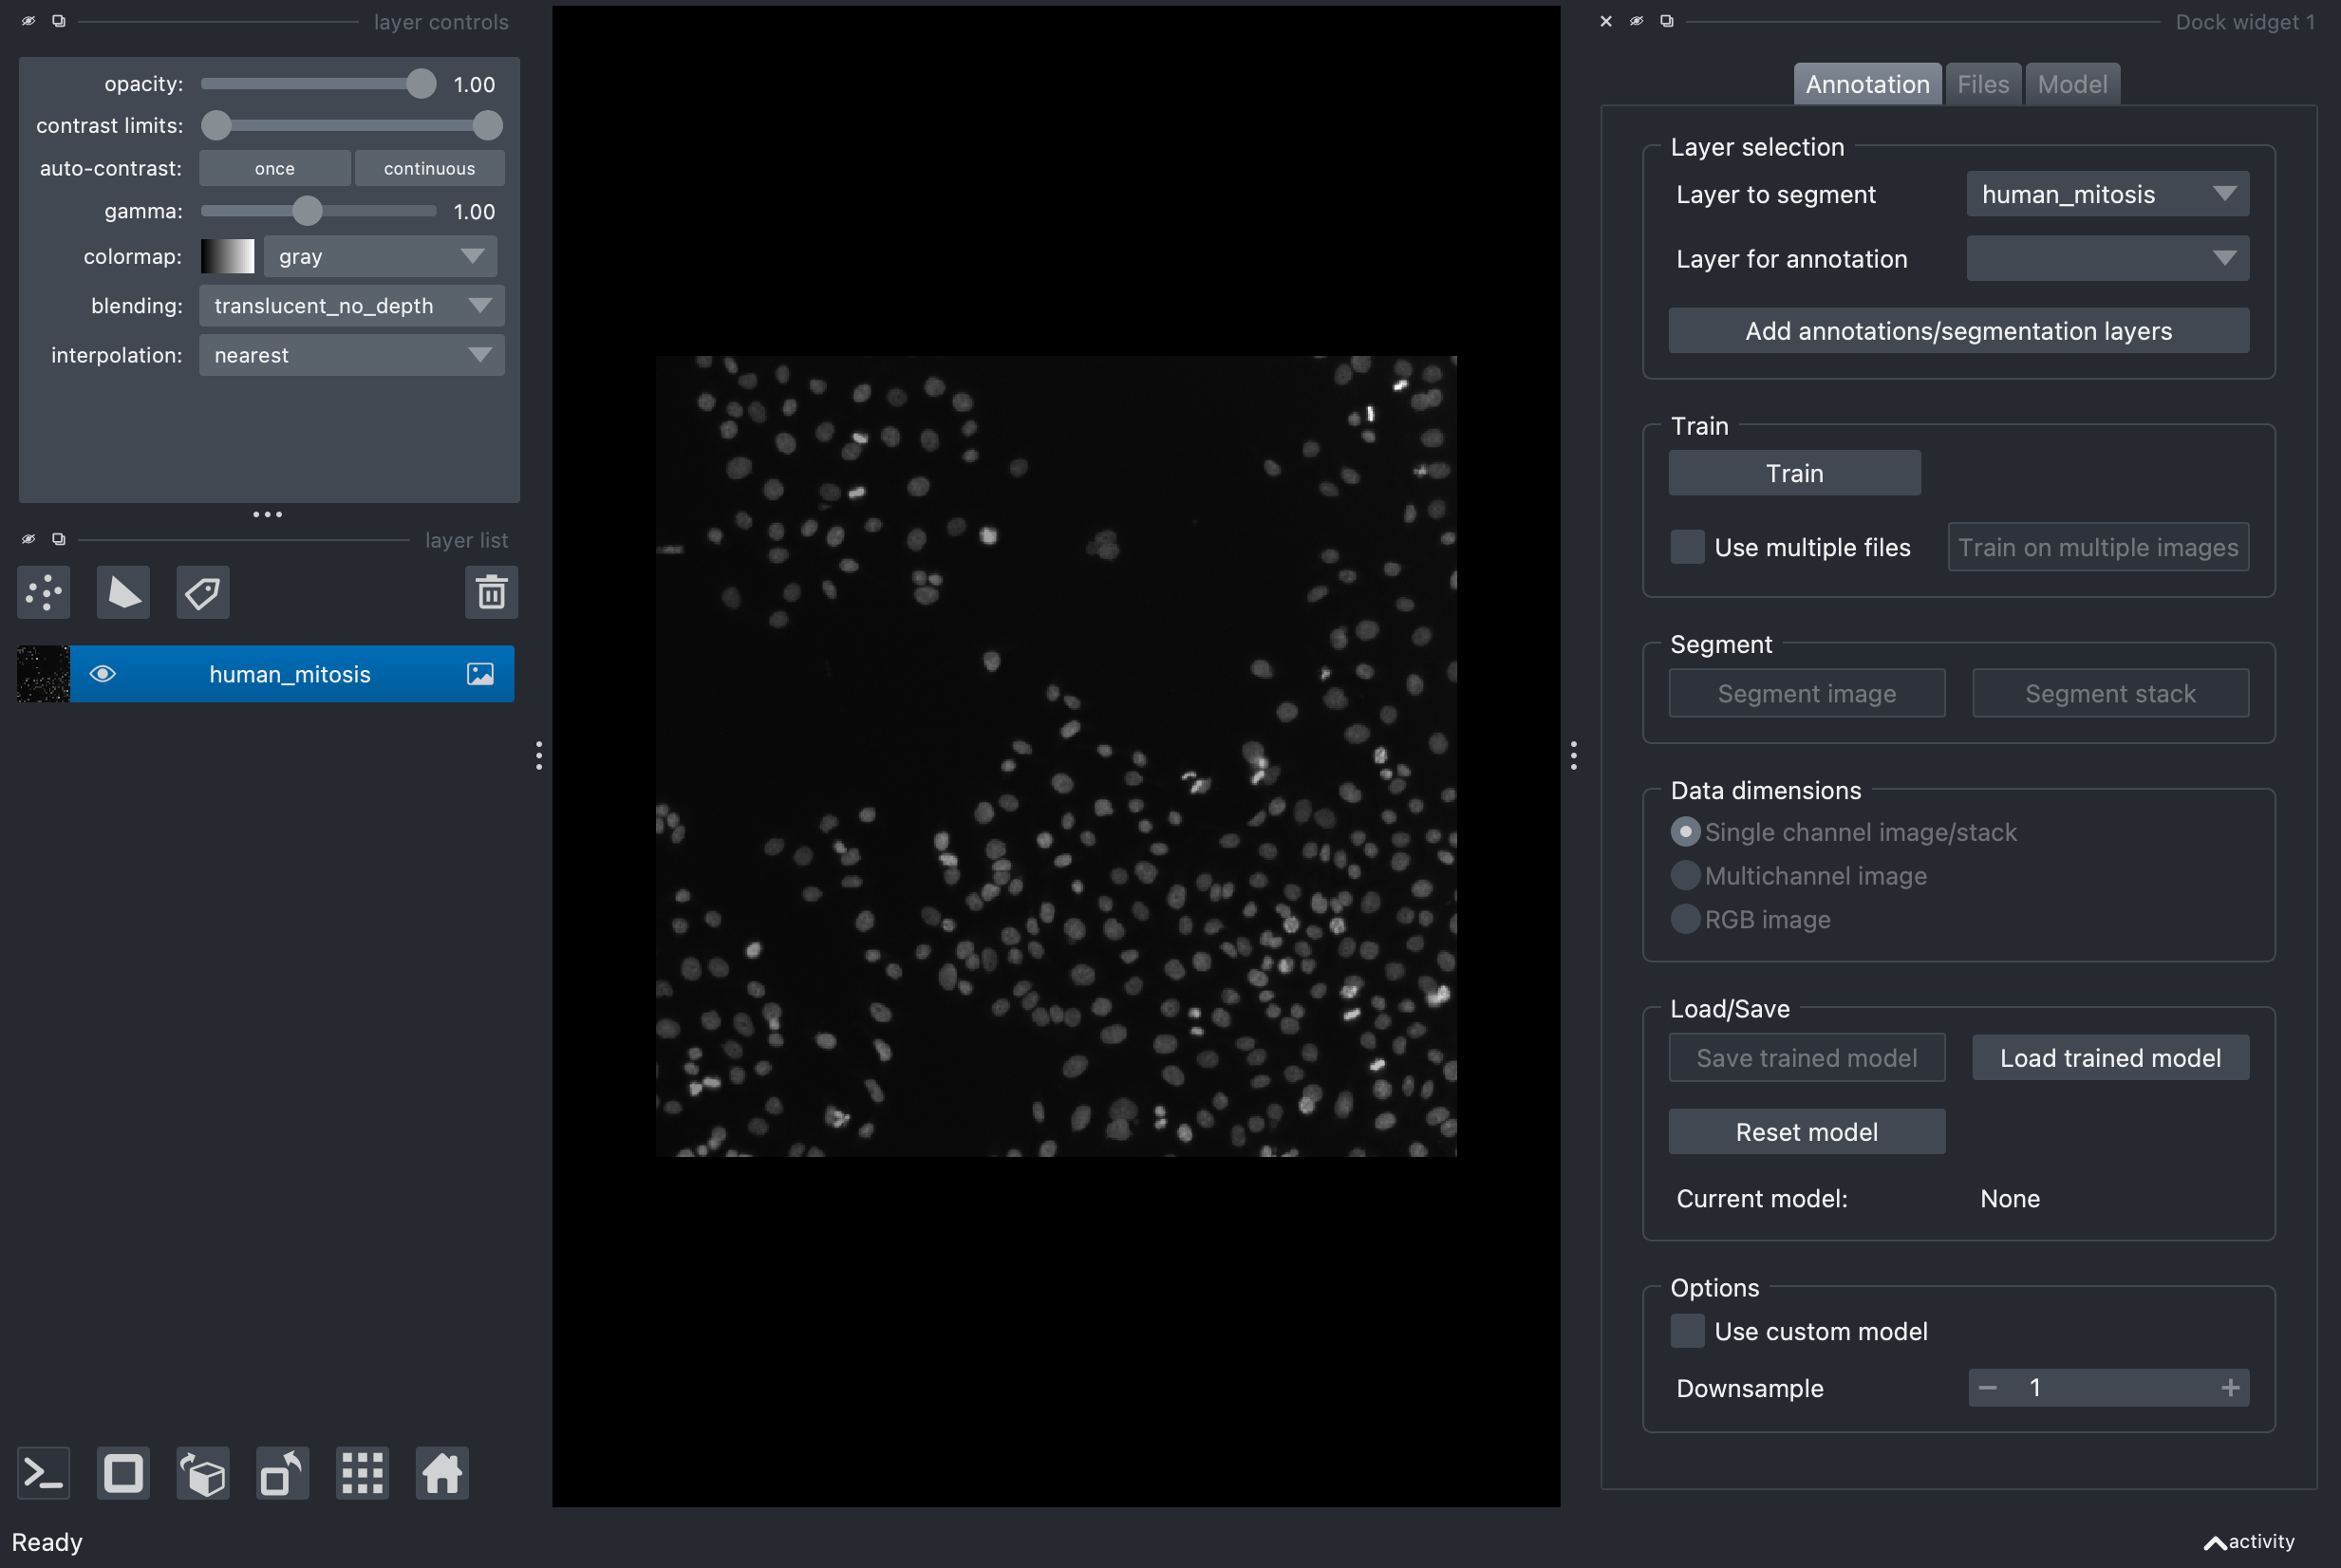

In [3]:
from napari.utils import nbscreenshot
nbscreenshot(viewer)

## Layer selection
If you have multiple image layers open, you can choose which one you want to segment. You can also choose a labels layer to use for annotations. If you don't yet have a labls layer, you can just click on ```Add annotations/segmentation layer```. Then using the labels tools (on the left of the viewer), you can pick the ```label``` to use for drawing. Each label will correspond to a given type of structure you want to segment. If you just want to detect one type of object, you will need two labels: one for background (e.g. 1) and one for objects (2). With the pen tool, you can then create annotations for training: 

In [5]:
self.add_annotation_layer()

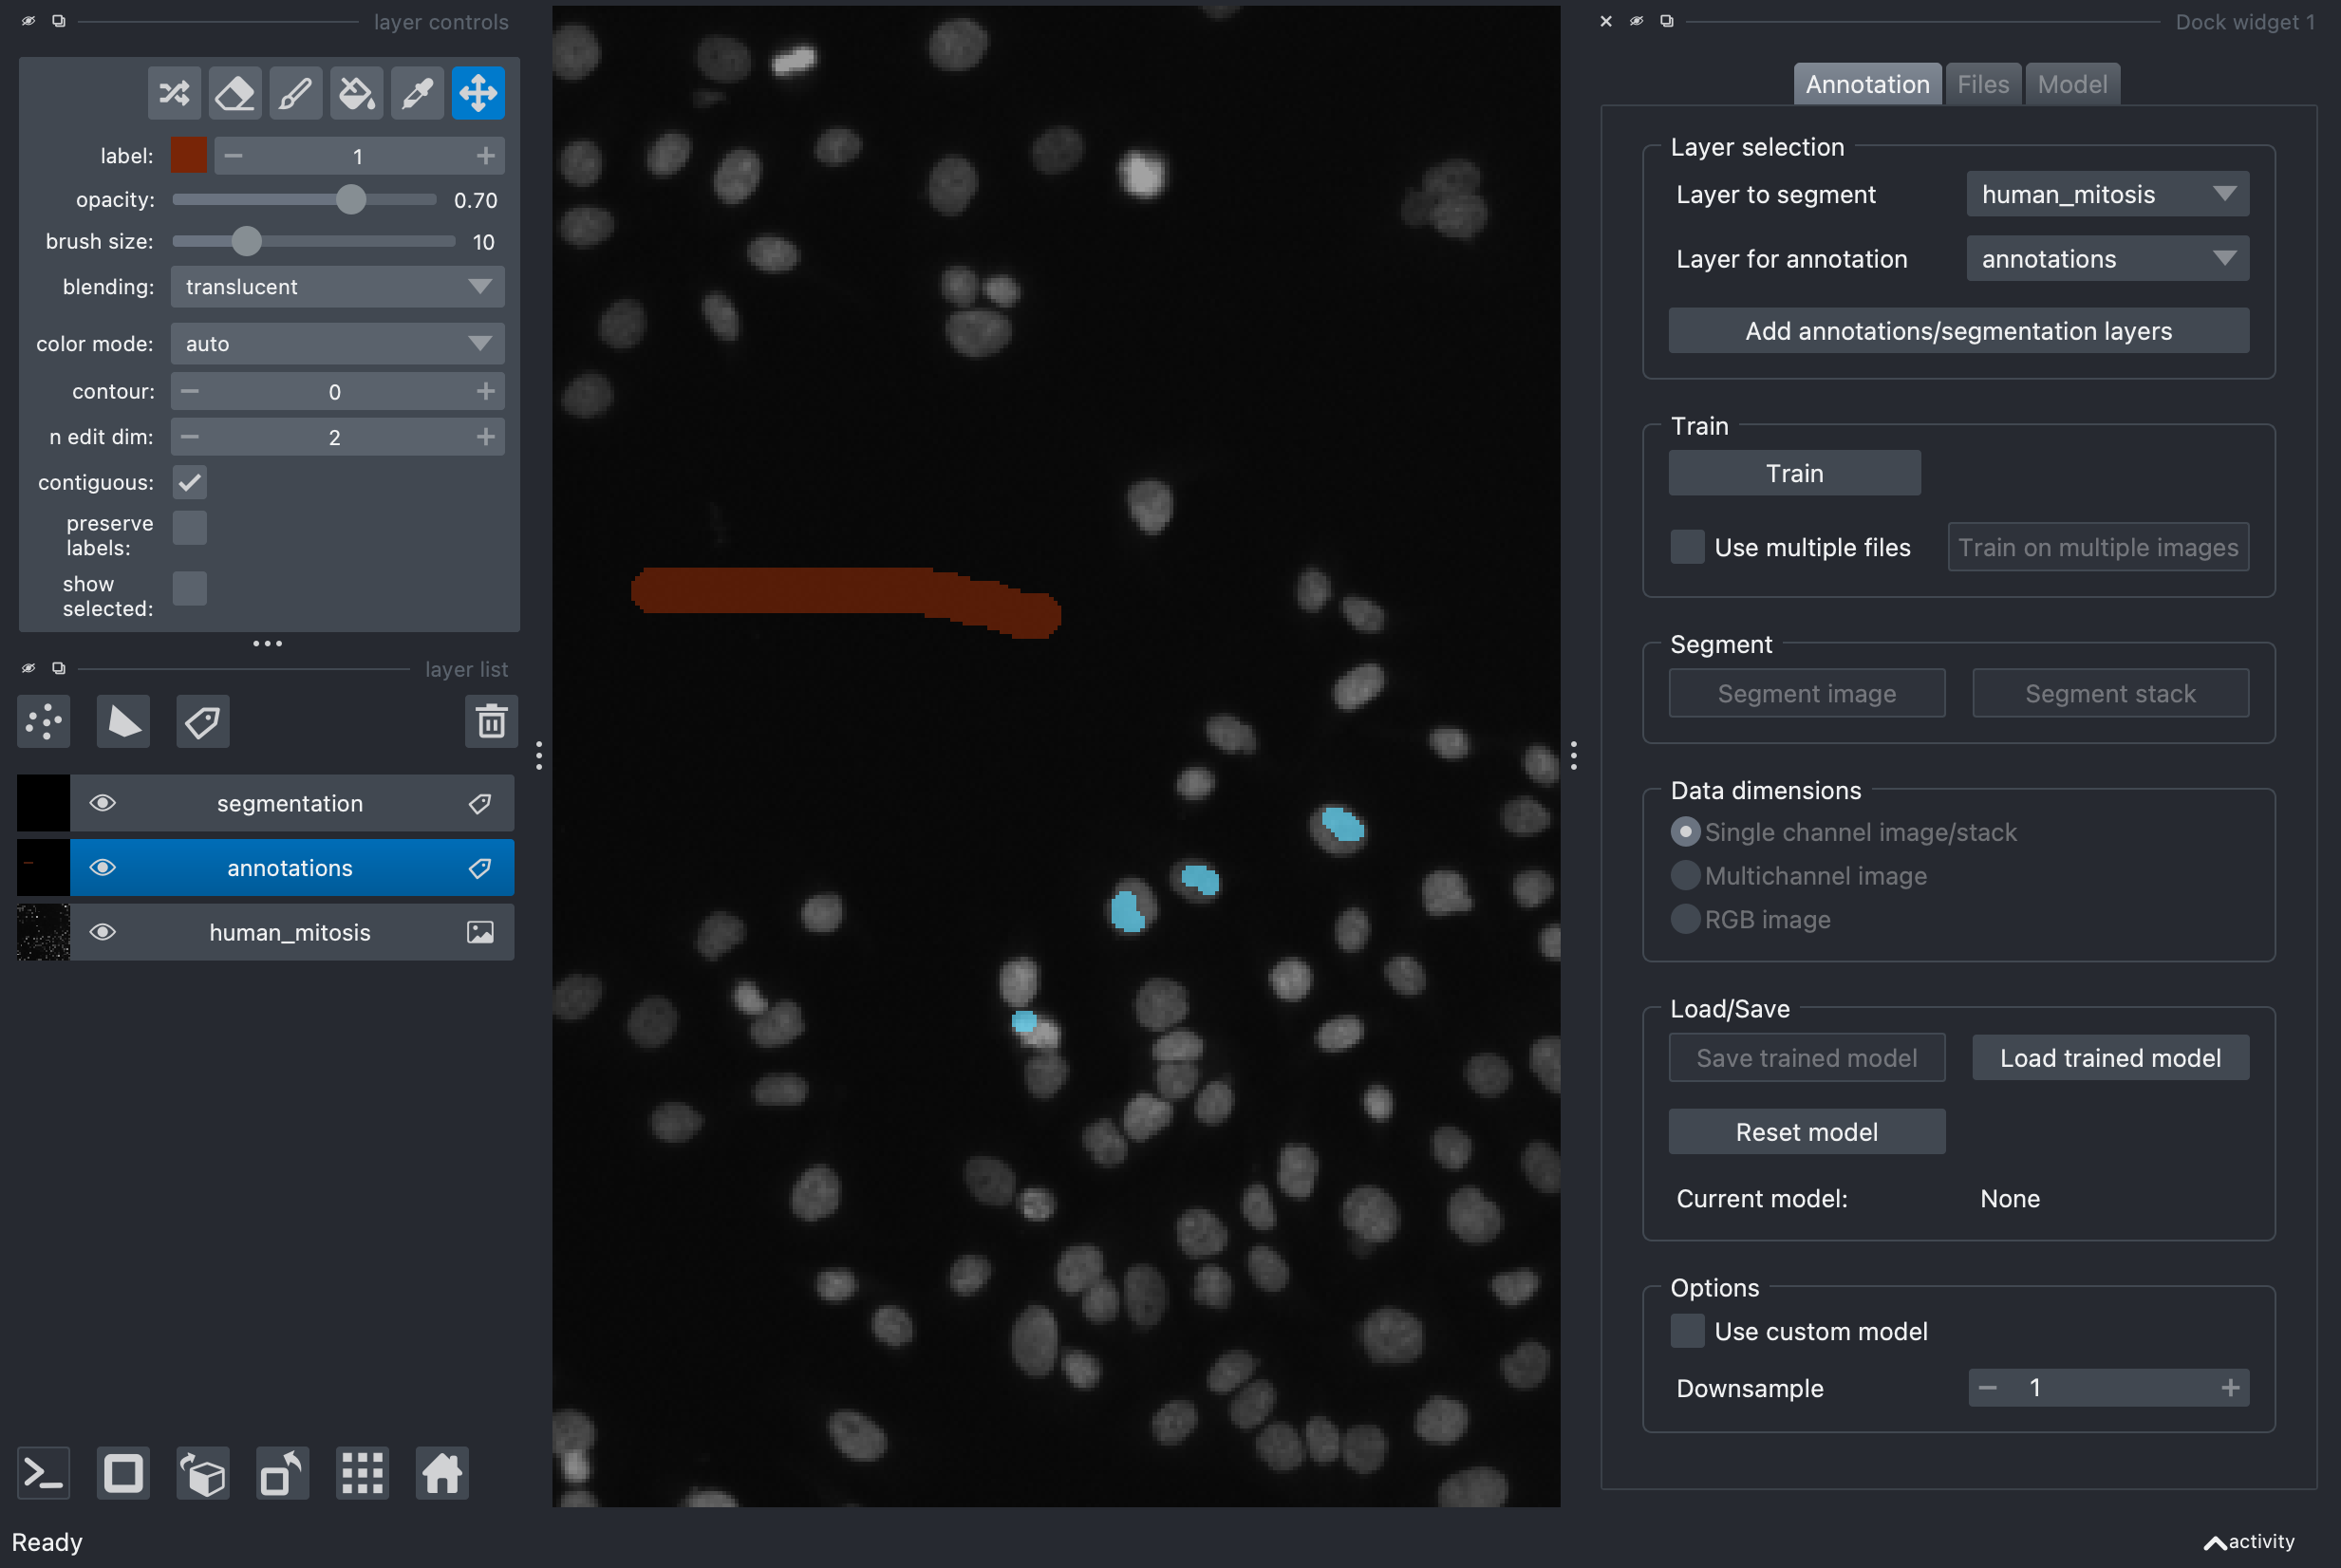

In [6]:
import skimage
#skimage.io.imsave('../../../Projects_data/napari-convpaint/first_steps_annotations.tiff',
#                 viewer.layers['annotations'].data, check_contrast=False)
labels = skimage.io.imread('../../../Projects_data/napari-convpaint/first_steps_annotations.tiff')
viewer.layers['annotations'].data = labels
viewer.layers['annotations'].refresh()

viewer.camera.zoom = 2.18
viewer.camera.center = (0.0, 255.04128441771698, 191.27981848034926)

nbscreenshot(viewer)

## Train and segment

Once you have added a few annotations, you can train your model. For that just, click on the ```Train``` button. A progress bar indicates whether training is finished or not. Once done, you can segment your image with the trained pixel classifier using the ```Segment image``` button:

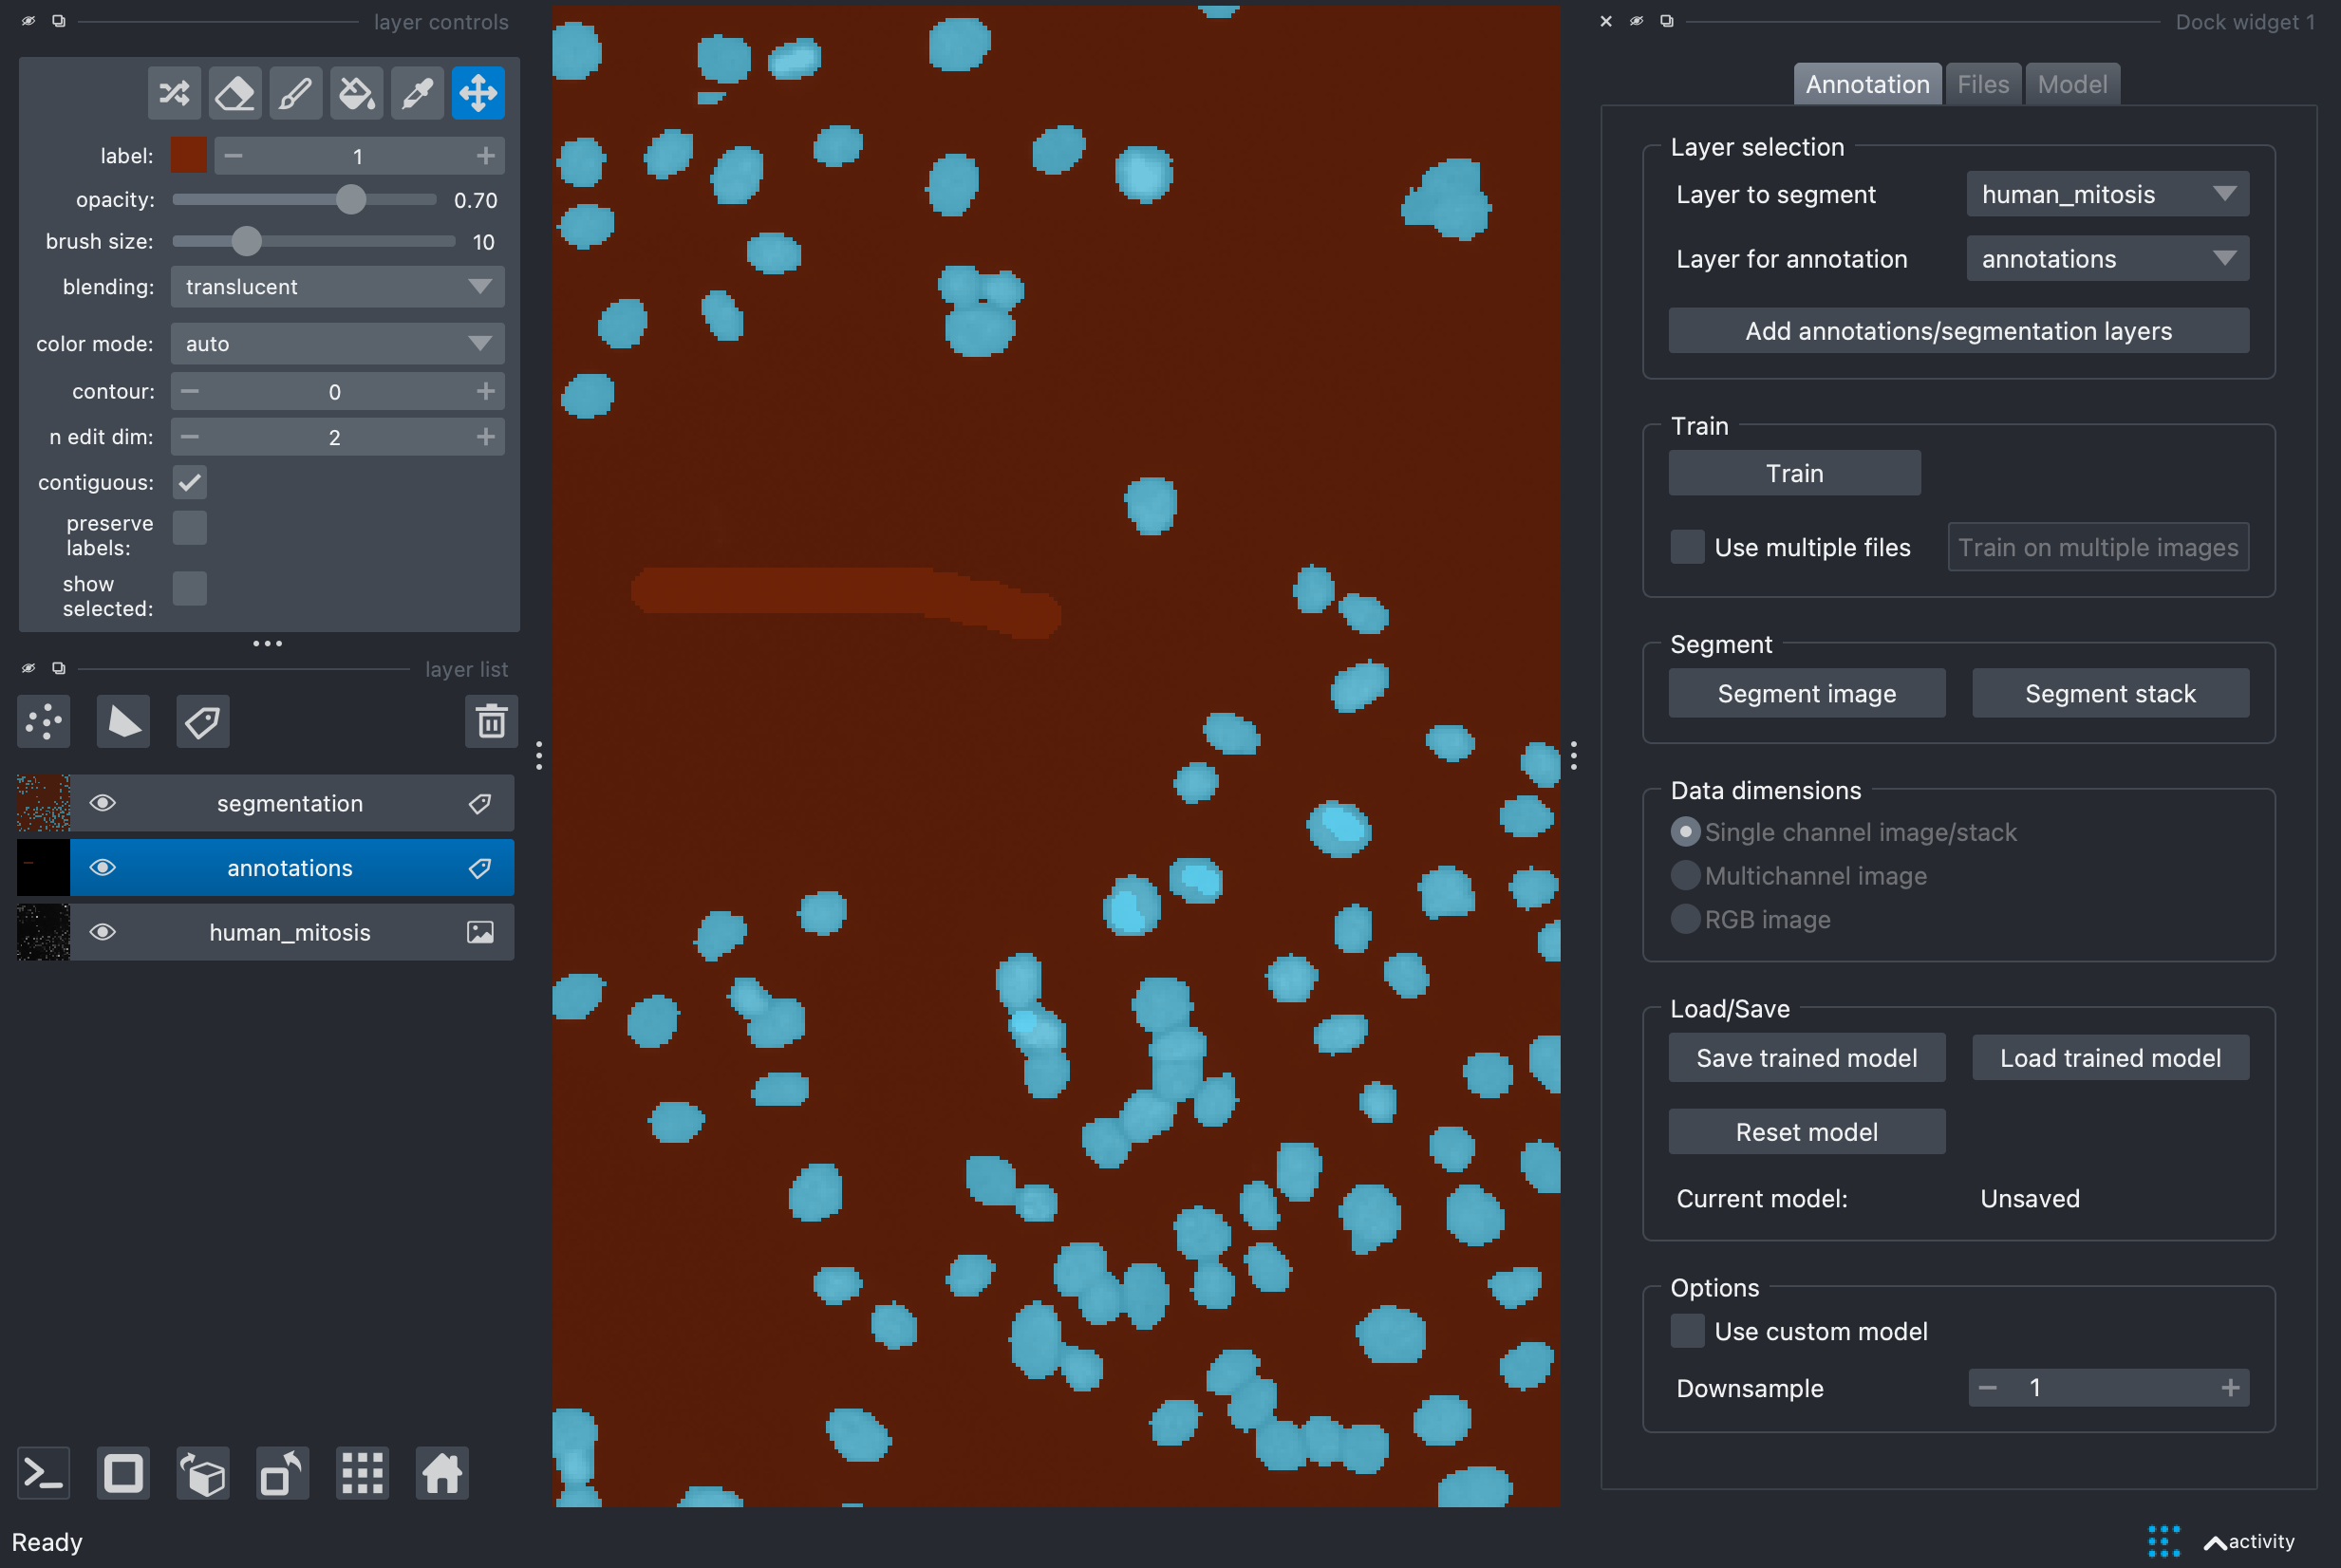

In [7]:
self.update_classifier()
self.predict()
nbscreenshot(viewer)

If you are not yet satisfied with the result, you can repeat the cycle: add more annotations, click on ```Train``` and click on ```Segment.

Once you are satisfied, you can save your model to your computer to be able to re-use it later one. For that click on the ```Save trained model``` button. This will prompt you to pick a model name and location. To reload the model, click on ```Load trained``` model and pick the ```*.jobib``` file with your chosen model name. The ```Current model``` line indicates what your current model is: no model, a trained but unsaved model or a model with a given name.